<a href="https://colab.research.google.com/github/Patisson4/ML/blob/master/lab7p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [1]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [2]:
a = torch.rand((3, 4), dtype=torch.float64)
b = torch.rand((12,), dtype=torch.float64)

a, b

(tensor([[0.4869, 0.6541, 0.4019, 0.9323],
         [0.4205, 0.0891, 0.1839, 0.2059],
         [0.7869, 0.2162, 0.5754, 0.6368]], dtype=torch.float64),
 tensor([0.6926, 0.8021, 0.7214, 0.1376, 0.8245, 0.2412, 0.4710, 0.0031, 0.0639,
         0.1740, 0.3996, 0.9700], dtype=torch.float64))

In [3]:
c = b.reshape(2, 2, 3)

c

tensor([[[0.6926, 0.8021, 0.7214],
         [0.1376, 0.8245, 0.2412]],

        [[0.4710, 0.0031, 0.0639],
         [0.1740, 0.3996, 0.9700]]], dtype=torch.float64)

In [4]:
a[:, 0]

tensor([0.4869, 0.4205, 0.7869], dtype=torch.float64)

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [5]:
a = torch.rand((5, 2), dtype=torch.float64)
b = torch.rand((1, 10), dtype=torch.float64)

a, b

(tensor([[0.6621, 0.9821],
         [0.9910, 0.2361],
         [0.5386, 0.7560],
         [0.2897, 0.4101],
         [0.2980, 0.8376]], dtype=torch.float64),
 tensor([[0.8764, 0.1823, 0.4730, 0.0398, 0.3928, 0.8311, 0.2381, 0.9389, 0.2650,
          0.2463]], dtype=torch.float64))

In [6]:
c = b.reshape((5, 2))

In [7]:
torch.add(a, c)
a

tensor([[0.6621, 0.9821],
        [0.9910, 0.2361],
        [0.5386, 0.7560],
        [0.2897, 0.4101],
        [0.2980, 0.8376]], dtype=torch.float64)

In [8]:
torch.sub(a, c)
a

tensor([[0.6621, 0.9821],
        [0.9910, 0.2361],
        [0.5386, 0.7560],
        [0.2897, 0.4101],
        [0.2980, 0.8376]], dtype=torch.float64)

In [10]:
torch.matmul(a, c.T)

tensor([[0.7593, 0.3523, 1.0762, 1.0796, 0.4174],
        [0.9116, 0.4782, 0.5855, 0.4576, 0.3208],
        [0.6099, 0.2849, 0.8399, 0.8380, 0.3290],
        [0.3287, 0.1534, 0.4547, 0.4540, 0.1778],
        [0.4139, 0.1743, 0.8131, 0.8573, 0.2853]], dtype=torch.float64)

In [11]:
torch.div(a, c)

tensor([[0.7555, 5.3862],
        [2.0950, 5.9332],
        [1.3713, 0.9097],
        [1.2170, 0.4369],
        [1.1243, 3.4001]], dtype=torch.float64)

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [12]:
images = torch.zeros((100, 200, 200, 3), dtype=torch.int)

In [13]:
for i in range(images.shape[0]):
    images[i, 2 * i : 2 * i + 2] = 255

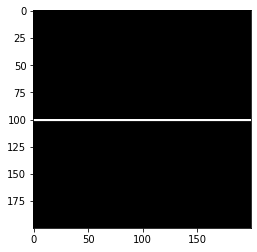

In [15]:
plt.imshow(images[50])

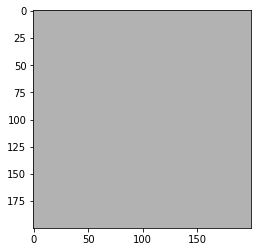

In [16]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [26]:
a = torch.rand((2, 3, 4), device='cuda')
b = torch.rand((1, 8, 3), device='cuda')
a = a.uniform_()
b = b.uniform_()
a, b

(tensor([[[0.3795, 0.3579, 0.8087, 0.9004],
          [0.3145, 0.0938, 0.2118, 0.5900],
          [0.6845, 0.3368, 0.9643, 0.8805]],
 
         [[0.5844, 0.8499, 0.0625, 0.7470],
          [0.8123, 0.9976, 0.6591, 0.4372],
          [0.8203, 0.8424, 0.2079, 0.6971]]], device='cuda:0'),
 tensor([[[0.4611, 0.8573, 0.3697],
          [0.9782, 0.1035, 0.2527],
          [0.9835, 0.1830, 0.9461],
          [0.8689, 0.9179, 0.2834],
          [0.5145, 0.1815, 0.9370],
          [0.9558, 0.2821, 0.8544],
          [0.6724, 0.8334, 0.7512],
          [0.1247, 0.1539, 0.6167]]], device='cuda:0'))

In [21]:
c = b.reshape(a.shape)

a.shape, c.shape

(torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

In [22]:
a = a.cpu()
c = c.cpu()

a.device, c.device

(device(type='cpu'), device(type='cpu'))

In [23]:
a = torch.autograd.Variable(a)
c = torch.autograd.Variable(c, requires_grad=True)

a, c

(tensor([[[0.6753, 0.0529, 0.2255, 0.6469],
          [0.6118, 0.1141, 0.6400, 0.1549],
          [0.7851, 0.1987, 0.5647, 0.4806]],
 
         [[0.2713, 0.5367, 0.1017, 0.4391],
          [0.6423, 0.0190, 0.2758, 0.1417],
          [0.0227, 0.1100, 0.3155, 0.9440]]]),
 tensor([[[0.2971, 0.6172, 0.1996, 0.4319],
          [0.7183, 0.5708, 0.4332, 0.2861],
          [0.1552, 0.3870, 0.0945, 0.2979]],
 
         [[0.9732, 0.9964, 0.9104, 0.5176],
          [0.5339, 0.0307, 0.6077, 0.1930],
          [0.6328, 0.5535, 0.0214, 0.9021]]], requires_grad=True))

In [24]:
L = torch.mean((c - a)**2)
L.backward()

In [25]:
c.grad

tensor([[[-0.0315,  0.0470, -0.0022, -0.0179],
         [ 0.0089,  0.0381, -0.0172,  0.0109],
         [-0.0525,  0.0157, -0.0392, -0.0152]],

        [[ 0.0585,  0.0383,  0.0674,  0.0065],
         [-0.0090,  0.0010,  0.0277,  0.0043],
         [ 0.0508,  0.0370, -0.0245, -0.0035]]])